In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats.distributions as dist

In [2]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset.isnull().sum()

# NO null values are there

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Looking at heatmap we say that glucose is having the highest correlation with out variable of interest

In [4]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


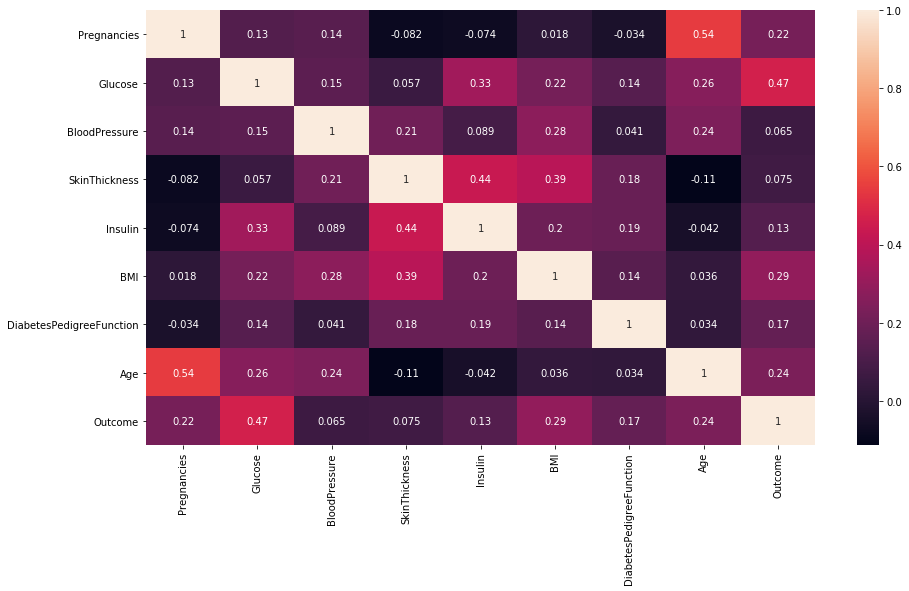

In [5]:
plt.figure(figsize = (15,8))
correlation_matrix = dataset.corr()

sns.heatmap(correlation_matrix , annot = True)
plt.show()

Looking at histogram we can estimate that the plot is right skewed having mean around 0 and range 15 , having no outliers specifically

It's showing a normal distribution with mean around 120, range is 200, having some outliers on the lower side of data

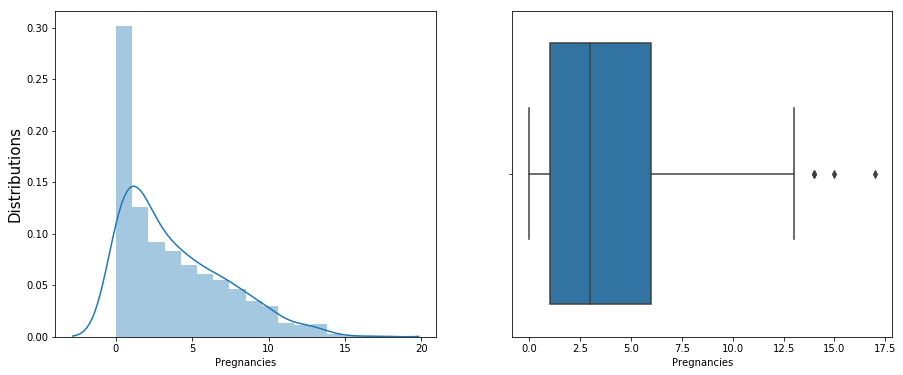

In [6]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
_ = sns.distplot(dataset.Pregnancies).set_ylabel("Distributions" , fontsize = 15)
plt.subplot(1,2,2)
_ = sns.boxplot(dataset.Pregnancies)

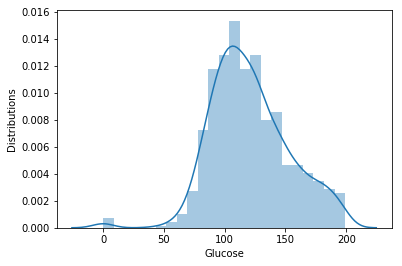

In [7]:
_ = sns.distplot(dataset.Glucose).set_ylabel('Distributions')

In [8]:
dataset.Age.describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [9]:
dataset['agegrp'] = pd.cut(dataset.Age , [18,30,40,50,60,70,80])

We can see that the Blood Pressure increases with Age

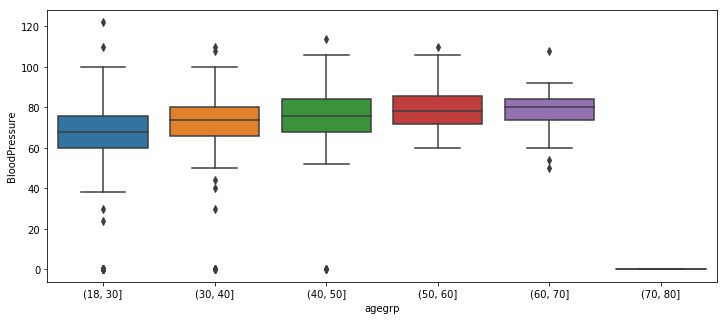

In [10]:
plt.figure(figsize = (12,5))
sns.boxplot(x = dataset.agegrp , y = dataset.BloodPressure)

In [11]:
dataset['Outcomex'] = dataset.Outcome.replace({1:'Diabetic' , 0:'Non-Diabetic'})

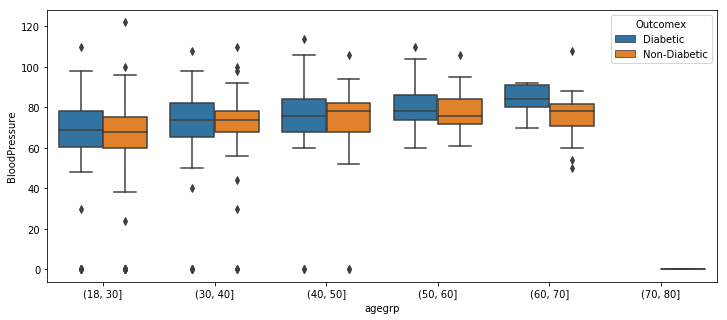

In [12]:
plt.figure(figsize = (12,5))
sns.boxplot(x = dataset.agegrp , y = dataset.BloodPressure , hue = dataset.Outcomex)

## Question 1

 Research Question : What proportion of people reported that they have diabetes?
 
 Target Population: Whole Population
 
 Parameter of Interest: Proportion

In [13]:
sample_size_pregnant = dataset[dataset['Outcome'] == 1]['Outcome'].count()
total_size = dataset.shape[0]
unbiased_point_estimate = np.round(sample_size_pregnant / total_size,100)
unbiased_point_estimate

0.3489583333333333

So according to our population the unbiased point estimate is 0.35, that means 35% of population in our sample reported that they are preganant

Margin of error = z * standard error

standard error = sqrt(p-hat*(1-p-hat/total_size))

In [14]:
Margin_of_error = 1.96 * np.sqrt(unbiased_point_estimate * (1-unbiased_point_estimate)/total_size)
Margin_of_error

0.03371061227097312


We estimated with 95% confidence, that the population proportion of females who are pregnant is estimated to be between 31% to 38% . That means with 95% confidence we are estimating that 32% to 38% of females are pregnant based on our sample size of 768

In [15]:
lcb = unbiased_point_estimate - Margin_of_error
ucb = unbiased_point_estimate + Margin_of_error
(lcb,ucb)

(0.3152477210623602, 0.3826689456043064)

Using statsmodels libray also we got the same result

In [16]:
sm.stats.proportion_confint(sample_size_pregnant,total_size)

(0.3152483405027714, 0.38266832616389523)

## Question 2

*2.1* Research Question: What is the average number of preganancy for a diabetic patient?

Target Population: Preganant Females having diabetes

Parameter of Interest: Average Month of pregnancy

In [17]:
unbiased_point_estimate = dataset[dataset.Outcome == 1]['Pregnancies'].mean()
std = dataset[dataset.Outcome == 1]['Pregnancies'].std()
(unbiased_point_estimate ,std)

(4.865671641791045, 3.7412390440415546)

In [18]:
Margin_of_error = 1.96 * std/np.sqrt(sample_size_pregnant)
Margin_of_error

0.4479237933103778

We estimated with 95% confidence interval that the average number of pregnancies for a diabetic patient is in between 4.41 to 5.31

In [19]:
lcb = unbiased_point_estimate - Margin_of_error
ucb = unbiased_point_estimate + Margin_of_error
(lcb,ucb)

(4.417747848480667, 5.313595435101423)

In [20]:
sm.stats.DescrStatsW(dataset[dataset.Outcome == 1]['Pregnancies']).zconfint_mean()

(4.417756079185482, 5.313587204396608)

*2.2* Research Question: What is the average month of pregnancy for a non-diabetic patient

Target Population: Pregnant females(Non-Diabetic)

Parameter of Interest: Average month for pregnancy

In [21]:
unbiased_point_estimate = dataset[dataset.Outcome == 0]['Pregnancies'].mean()
std = dataset[dataset.Outcome == 0]['Pregnancies'].std()
(unbiased_point_estimate , std)

(3.298, 3.0171845826218893)

In [22]:
Margin_of_error = 1.96 * std/np.sqrt(dataset[dataset.Outcome == 0]['Outcome'].count())
Margin_of_error

0.26446788923434944

In [23]:
lcb = unbiased_point_estimate - Margin_of_error
ucb = unbiased_point_estimate + Margin_of_error
(lcb,ucb)

(3.0335321107656505, 3.5624678892343495)

With 95% confidence,the population mean of total number of pregnancies for a non-diabetic patient is estimated to be in between 3.03 to 3.56, we can observe here that it is clearly distinct with the average number of pregnancies for a diabetic patient(4.41 , 5.31). If the number of pregnancies is equal or more than 4, we can estimate that it's a diabetic patient.

Below the python code to find out the above results

In [24]:
sm.stats.DescrStatsW(dataset[dataset.Outcome == 0]['Pregnancies']).zconfint_mean()

(3.033536970425177, 3.562463029574823)

To solidify our above observation, we can now find the average difference of pregnancies for diabetic and non diabetic patients

Research Question: Find the average pregnancy difference for diabetic and non-diabetic patient

Population of Interest: Pregnant Females

Parameter of Interest: (*U<sub>1</sub>* - *U<sub>2</sub>*):Pregnancies

Note that 1 = Diabetic,2 = Non-Diabetic


In [25]:
std1 = dataset[dataset.Outcome == 1]['Pregnancies'].std()
std2 = dataset[dataset.Outcome == 0]['Pregnancies'].std()
(std1**2 , std2**2)

(13.996869584660965, 9.103402805611225)

### Unpooled Approach

In [26]:
mean1 = dataset[dataset.Outcome == 1]['Pregnancies'].mean()
mean2 = dataset[dataset.Outcome == 0]['Pregnancies'].mean()
print(mean1 - mean2)

n1 = dataset[dataset.Outcome == 1]['Pregnancies'].count()
n2 = dataset[dataset.Outcome == 0]['Pregnancies'].count()

(n1,n2)

1.567671641791045


(268, 500)

In [27]:
t_star = 1.98
Margin_of_error = t_star*np.sqrt(std1**2/n1 + std**2/n2)
Margin_of_error

0.5254799547144376

In [28]:
lcb = (mean1 - mean2) - Margin_of_error
ucb = (mean1 - mean2) + Margin_of_error
(lcb,ucb)

(1.0421916870766075, 2.0931515965054825)

### Pooled Approach

In [29]:
Margin_of_error = t_star * np.sqrt(((n1 - 1)*std1**2 + (n2 - 1)*std2**2)/(n1 + n2 - 2)) * np.sqrt(1/n1 + 1/n2)
Margin_of_error

0.492819572445543

Here we can see that using both the approaches we get almost same result, and that's the good thing as our results are more robust. So, with 95% confidence interval, the population mean difference between the number of pregnancies for a diabetic patient is estimated to be 1,o4 to 2.09 more than the non-diabetic patient.

In [30]:
lcb = (mean1 - mean2) - Margin_of_error
ucb = (mean1 - mean2) + Margin_of_error
(lcb,ucb)

(1.0748520693455021, 2.060491214236588)

### We can also confirm the above results using hypothesis testing

Research Question: Is there a significant difference between the number of pregnancies for a diabetic ad non diabetic patient

$H_0$ : mu1 - mu2 = 0

$H_1$ : mu1 - mu2 $\neq$ 0

significance level = 0.05

Test-statistic = Best estimate - Hypothesised result / standard error

Test-statistic: A measure of how far our sample statistic is from our hypothesized population parameter, in terms of estimated standard errors. The farther away our sample statistic is, the less confident we will be in our null hypothesised value

Assumptions:
1. Data collected using simple random sampling.
2. Distribution is approximately normal, or we have large enough sample size so that we can rely on central limit theorem

#### Pooled Approach

In [31]:
best_estimate = mean1 - mean2
std_error = np.sqrt(std1**2/n1 + std**2/n2)
test_statistic = best_estimate/std_error
p_val = 2*dist.norm.cdf(-np.abs(test_statistic))
(test_statistic , p_val)

(5.9069614794974905, 3.484751922877582e-09)

#### Unpooled Approach

In [32]:
best_estimate = mean1 - mean2
std_error = np.sqrt(((n1 - 1)*std1**2 + (n2 - 1)*std2**2)/(n1 + n2 - 2)) * np.sqrt(1/n1 + 1/n2)
test_statistic = best_estimate/std_error
p_val = 2*dist.norm.cdf(-np.abs(test_statistic))
(test_statistic , p_val)

(6.298430550035151, 3.006743856829293e-10)

We can observe that our p-value is less than significance level, that means we have enough evidence to reject our null hypothesis. Based on our estimated difference in sample means we have enough evidence to support that there is a difference between the average number of pregnancies for diabetic and non diabetic patient

In [33]:
sm.stats.ztest(dataset[dataset.Outcome == 1]['Pregnancies'] , dataset[dataset.Outcome == 0]['Pregnancies'])

(6.298430550035151, 3.006743856829293e-10)

We can calculate the average difference in number of pregnancies stratified by age 

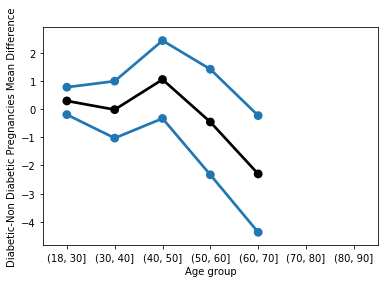

In [34]:
dataset['agegrp'] = pd.cut(dataset.Age , [18,30,40,50,60,70,80,90])

dataset['Outcomex'] = dataset.Outcome.replace({1:'Diabetic',0:'Non-Diabetic'})
#Mean
dx_mean = dataset.groupby(['agegrp','Outcomex']).agg({'Pregnancies':[np.mean]}).unstack()
dx_mean.columns = ['Diabetic','Non_Diabetic']

# Standard Deviation
dx_std = dataset.groupby(['agegrp','Outcomex']).agg({'Pregnancies':[np.std]}).unstack()
dx_std.columns = ['Diabetic','Non_Diabetic']

# Size
dx_size = dataset.groupby(['agegrp','Outcomex']).agg({'Pregnancies':[np.size]}).unstack()
dx_size.columns = ['Diabetic','Non_Diabetic']

mean_diff = dx_mean.Diabetic - dx_mean.Non_Diabetic
se = dx_std/np.sqrt(dx_size)
se_diff = np.sqrt(se.Diabetic**2 + se.Non_Diabetic**2)

x = np.arange(dx_size.shape[0])
pp = sns.pointplot(x , mean_diff , color = 'black')
pp.set(xlabel = 'Age group' , ylabel = "Diabetic-Non Diabetic Pregnancies Mean Difference")
sns.pointplot(x , mean_diff - 1.96*se_diff)
sns.pointplot(x , mean_diff + 1.96*se_diff)
pp.set_xticklabels(dx_size.index)
plt.show()


Now Let's Look at Blood Pressure of Diabetic and Non Diabetic

$Research Question$: What's the average Blood Pressure of diabetic patient?

Population: Diabetic Patients

Parameter of interest: Average Blood Pressure

In [37]:
unbiased_point_estimate = dataset[dataset.Outcome == 1]['BloodPressure'].mean()
std = dataset[dataset.Outcome == 1]['BloodPressure'].std()
(unbiased_point_estimate,std)

(70.82462686567165, 21.491811650604127)

In [38]:
Margin_of_error = 1.96 * std/np.sqrt(dataset[dataset.Outcome == 1]['BloodPressure'].count())
Margin_of_error

2.5731298338133795

We estimated with 95% confidence that the average Blood Pressure for a diabetic patient is in between 68.25 to 73.39

In [39]:
lcb = unbiased_point_estimate - Margin_of_error
ucb = unbiased_point_estimate + Margin_of_error
(lcb,ucb)

(68.25149703185826, 73.39775669948503)

In [42]:
sm.stats.DescrStatsW(dataset[dataset.Outcome == 1]['BloodPressure']).zconfint_mean()

(68.25154431372279, 73.3977094176205)

Research Question: What's the average Blood Pressure of non diabetic patient?

Population: Diabetic Patients

Parameter of interest: Average Blood Pressure

In [40]:
unbiased_point_estimate = dataset[dataset.Outcome == 0]['BloodPressure'].mean()
std = dataset[dataset.Outcome == 0]['BloodPressure'].std()
(unbiased_point_estimate,std)

(68.184, 18.063075413305828)

In [41]:
Margin_of_error = 1.96 * std/np.sqrt(dataset[dataset.Outcome == 0]['BloodPressure'].count())
Margin_of_error

1.5832983686687918

In [43]:
lcb = unbiased_point_estimate - Margin_of_error
ucb = unbiased_point_estimate + Margin_of_error
(lcb,ucb)

(66.6007016313312, 69.76729836866879)

In [46]:
sm.stats.DescrStatsW(dataset[dataset.Outcome == 0]['BloodPressure']).zconfint_mean()

(66.60073072481028, 69.76726927518972)

Research Question: Is there a significant difference of average Blood Pressure for Diabetic and Non-Diabetic patients?

Population: Diabetic Patients

Parameter of Interest: (*U<sub>1</sub>* - *U<sub>2</sub>*):Blood Pressure

Note that 1 = Diabetic,2 = Non-Diabetic

In [52]:
mean1 = dataset[dataset.Outcome == 1]['BloodPressure'].mean()
mean2 = dataset[dataset.Outcome == 0]['BloodPressure'].mean()
(mean1 , mean2)
(n1,n2)

(268, 500)

In [49]:
std1 = dataset[dataset.Outcome == 0]['BloodPressure'].std()
std2 = dataset[dataset.Outcome == 1]['BloodPressure'].std()
(std1**2 , std2**2)

(326.2746933867735, 461.8979680250433)

#### Pooled Approach

In [50]:
Margin_of_error = t_star * np.sqrt(((n1 - 1)*std1**2 + (n2 - 1)*std2**2)/(n1 + n2 - 2)) * np.sqrt(1/n1 + 1/n2)
Margin_of_error

3.0522557742930365

In [51]:
lcb = (mean1 - mean2) - Margin_of_error
ucb = (mean1 - mean2) + Margin_of_error
(lcb,ucb)

(-0.41162890862138735, 5.692882639964686)

#### Unpooled Approach

In [53]:
t_star = 1.98
Margin_of_error = t_star*np.sqrt(std1**2/n1 + std**2/n2)
Margin_of_error

2.707603683201397

In both the approaches we used, we have zero as a possible value for our parameter, so we cannot say that there is a significant difference of average blood pressure for diabetic and non diabetic patient

In [54]:
lcb = (mean1 - mean2) - Margin_of_error
ucb = (mean1 - mean2) + Margin_of_error
(lcb,ucb)

(-0.06697681752974782, 5.348230548873046)

Next we can do hypothesis testing to confirm our above results

Research Question: Is there a significant difference of average blood pressure for a diabetic and non diabetic patient

$H_0$ : mu1 - mu2 = 0

$H_1$ : mu1 - mu2 $\neq$ 0

significance level = 0.05

Test-statistic = Best estimate - Hypothesised result / standard error

Test-statistic: A measure of how far our sample statistic is from our hypothesized population parameter, in terms of estimated standard errors. The farther away our sample statistic is, the less confident we will be in our null hypothesised value

Assumptions:
1. Data collected using simple random sampling.
2. Distribution is approximately normal, or we have large enough sample size so that we can rely on central limit theorem

#### Pooled Approach

In [55]:
best_estimate = mean1 - mean2
std_error = np.sqrt(std1**2/n1 + std**2/n2)
test_statistic = best_estimate/std_error
p_val = 2*dist.norm.cdf(-np.abs(test_statistic))
(test_statistic , p_val)

(1.9310215990871673, 0.053480381402312684)

In [56]:
best_estimate = mean1 - mean2
std_error = np.sqrt(((n1 - 1)*std1**2 + (n2 - 1)*std2**2)/(n1 + n2 - 2)) * np.sqrt(1/n1 + 1/n2)
test_statistic = best_estimate/std_error
p_val = 2*dist.norm.cdf(-np.abs(test_statistic))
(test_statistic , p_val)

(1.7129761005172892, 0.08671693649997118)

We conclude from the above results that we don't have enough evidence to reject the NULL hypothesis as our p-val is not significant at 5% level


We can calculate the average BloodPressure difference stratified by age

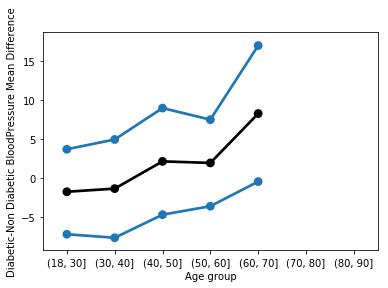

In [57]:
dataset['agegrp'] = pd.cut(dataset.Age , [18,30,40,50,60,70,80,90])

dataset['Outcomex'] = dataset.Outcome.replace({1:'Diabetic',0:'Non-Diabetic'})
#Mean
dx_mean = dataset.groupby(['agegrp','Outcomex']).agg({'BloodPressure':[np.mean]}).unstack()
dx_mean.columns = ['Diabetic','Non_Diabetic']

# Standard Deviation
dx_std = dataset.groupby(['agegrp','Outcomex']).agg({'BloodPressure':[np.std]}).unstack()
dx_std.columns = ['Diabetic','Non_Diabetic']

# Size
dx_size = dataset.groupby(['agegrp','Outcomex']).agg({'BloodPressure':[np.size]}).unstack()
dx_size.columns = ['Diabetic','Non_Diabetic']

mean_diff = dx_mean.Diabetic - dx_mean.Non_Diabetic
se = dx_std/np.sqrt(dx_size)
se_diff = np.sqrt(se.Diabetic**2 + se.Non_Diabetic**2)

x = np.arange(dx_size.shape[0])
pp = sns.pointplot(x , mean_diff , color = 'black')
pp.set(xlabel = 'Age group' , ylabel = "Diabetic-Non Diabetic BloodPressure Mean Difference")
sns.pointplot(x , mean_diff - 1.96*se_diff)
sns.pointplot(x , mean_diff + 1.96*se_diff)
pp.set_xticklabels(dx_size.index)
plt.show()

#### We can also apply our statistics on Glucose

$Research Question$: What is the average glucose level for diabetic patient

Population: Diabetic Patient

Parameter of Interest: Average Glucose level

In [59]:
unbiased_point_estimate = dataset[dataset.Outcome == 1]['Glucose'].mean()
unbiased_point_estimate

141.25746268656715

In [60]:
std = dataset[dataset.Outcome == 1]['Glucose'].std()
std

31.939622058007203

In [61]:
std_error = std/np.sqrt(dataset[dataset.Outcome == 1]['Glucose'].count())
std_error
                        

1.9510229398885648

In [66]:
lcb = unbiased_point_estimate - 1.96 *std_error
ucb = unbiased_point_estimate + 1.96 *std_error
(lcb , ucb)

(137.43345772438556, 145.08146764874874)

With 95% confidence, the population average glucose level for diabetic patient is estimated to be in between 138 to 145

In [65]:
sm.stats.DescrStatsW(dataset[dataset.Outcome == 1]['Glucose']).zconfint_mean()

(137.43352799137412, 145.08139738176018)

$Research Question$: What is the average glucose level for non-diabetic patient

Population: Non-Diabetic Patient

Parameter of Interest: Average Glucose level

In [69]:
unbiased_point_estimate = dataset[dataset.Outcome == 0]['Glucose'].mean()
std = dataset[dataset.Outcome == 0]['Glucose'].std()
print((unbiased_point_estimate,std))

std_error = std/np.sqrt(dataset[dataset.Outcome == 0]['Glucose'].count())
print(std_error)

lcb = unbiased_point_estimate - 1.96 *std_error
ucb = unbiased_point_estimate + 1.96 *std_error
(lcb , ucb)

(109.98, 26.14119975535359)
1.16906999332743


(107.68862281307824, 112.27137718692177)

We can see that there is a clear distinction of glucose level between the diabetic and non diabetic patient. Wit 95% confidence the population average glucose level for non diabetic patients is estimated to be in between 108 to 112

In [71]:
sm.stats.DescrStatsW(dataset[dataset.Outcome == 0]['Glucose']).zconfint_mean()

(107.68866491767176, 112.27133508232825)

$Research Question$: Is there a significant difference of average Glucose level for Diabetic and Non-Diabetic patients?

Population: Patients

Parameter of Interest: (*U<sub>1</sub>* - *U<sub>2</sub>*):Glucose

Note that 1 = Diabetic,2 = Non-Diabetic

In [73]:
mean1 = dataset[dataset.Outcome == 1]['Glucose'].mean()
mean2 = dataset[dataset.Outcome == 0]['Glucose'].mean()
print(mean1 , mean2)
print(n1,n2)

std1 = dataset[dataset.Outcome == 1]['Glucose'].std()
std2 = dataset[dataset.Outcome == 0]['Glucose'].std()
(std1**2 , std2**2)



141.25746268656715 109.98
268 500


(1020.1394572083402, 683.3623246492986)

 The variance is not equal
 
 ### Unpooled Approach 

With 95% confidence, the population average glucose level is 26 to 35 units more in diabetic patients as compared to non diabetic patients.

In [74]:
t_star = 1.98
Margin_of_error = t_star*np.sqrt(std1**2/n1 + std**2/n2)
Margin_of_error

lcb = (mean1 - mean2) - Margin_of_error
ucb = (mean1 - mean2) + Margin_of_error
(lcb,ucb)

(26.774011485738725, 35.78091388739557)

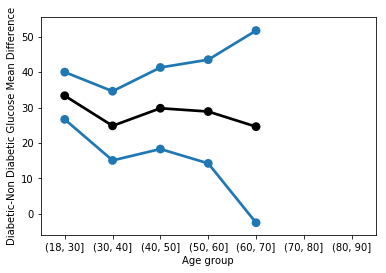

In [76]:
dataset['agegrp'] = pd.cut(dataset.Age , [18,30,40,50,60,70,80,90])

dataset['Outcomex'] = dataset.Outcome.replace({1:'Diabetic',0:'Non-Diabetic'})
#Mean
dx_mean = dataset.groupby(['agegrp','Outcomex']).agg({'Glucose':[np.mean]}).unstack()
dx_mean.columns = ['Diabetic','Non_Diabetic']

# Standard Deviation
dx_std = dataset.groupby(['agegrp','Outcomex']).agg({'Glucose':[np.std]}).unstack()
dx_std.columns = ['Diabetic','Non_Diabetic']

# Size
dx_size = dataset.groupby(['agegrp','Outcomex']).agg({'Glucose':[np.size]}).unstack()
dx_size.columns = ['Diabetic','Non_Diabetic']

mean_diff = dx_mean.Diabetic - dx_mean.Non_Diabetic
se = dx_std/np.sqrt(dx_size)
se_diff = np.sqrt(se.Diabetic**2 + se.Non_Diabetic**2)

x = np.arange(dx_size.shape[0])
pp = sns.pointplot(x , mean_diff , color = 'black')
pp.set(xlabel = 'Age group' , ylabel = "Diabetic-Non Diabetic Glucose Mean Difference")
sns.pointplot(x , mean_diff - 1.96*se_diff)
sns.pointplot(x , mean_diff + 1.96*se_diff)
pp.set_xticklabels(dx_size.index)
plt.show()

As we can observe from the above plot, the difference in estimated average glucose level is larger for higher age groups, one reason for that might be because we have less data in these age groups, as shown below 

In [95]:
dx = dataset.groupby(['agegrp' , 'Outcomex'])['Outcome'].apply(lambda x:x.count()).unstack()
dx['Total'] = dx.sum(axis = 1)
dx = dx.apply(lambda x:x/x.sum(axis = 0))
dx

Outcomex,Diabetic,Non-Diabetic,Total
agegrp,,,
"(18, 30]",0.335821,0.654,0.542969
"(30, 40]",0.283582,0.162,0.204427
"(40, 50]",0.238806,0.098,0.147135
"(50, 60]",0.115672,0.046,0.070312
"(60, 70]",0.026119,0.036,0.032552
"(70, 80]",NaN,0.002,0.001302
"(80, 90]",NaN,0.002,0.001302


In [96]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,agegrp,Outcomex
0,6,148,72,35,0,33.6,0.627,50,1,"(40, 50]",Diabetic
1,1,85,66,29,0,26.6,0.351,31,0,"(30, 40]",Non-Diabetic
2,8,183,64,0,0,23.3,0.672,32,1,"(30, 40]",Diabetic
3,1,89,66,23,94,28.1,0.167,21,0,"(18, 30]",Non-Diabetic
4,0,137,40,35,168,43.1,2.288,33,1,"(30, 40]",Diabetic


**Important Note**: So far we have got two possible predictors one is Pregnancies and the other is Glucose level.

Let's do some model fitting based on that

In [107]:
model = sm.GLM.from_formula('Outcome ~ Pregnancies', family = sm.families.Binomial() , data = dataset)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                            GLM   Df Residuals:                      766
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -478.10
Date:                Tue, 23 Jun 2020   Deviance:                       956.21
Time:                        10:51:43   Pearson chi2:                     770.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.1767      0.123     -9.558      0.000      -1.418      -0.935
Pregnancies     0.1372      0.023      5.986      0.000       0.092       0.182
===============================================================================
"""

### Add additional covariate

In [113]:
model = sm.GLM.from_formula('Outcome ~ Pregnancies + Glucose', family = sm.families.Binomial() , data = dataset)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                            GLM   Df Residuals:                      765
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.47
Date:                Tue, 23 Jun 2020   Deviance:                       784.95
Time:                        10:57:00   Pearson chi2:                 1.03e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -5.7515      0.441    -13.052      0.000      -6.615      -4.888
Pregnancies     0.1233      0.026      4.818      0.000       0.073       0.173
Glucose         0.0371      0.003     11.321      0.000       0.031       0.043
===============================================================================
"""

Adding Glucose to the model leads to a very small shift in the Pregnancies (it changed from .1372 to .1233).In general, regression coefficients can change a lot when adding or removing other variables from a model.  But in this case the change is quite minimal. The log odds for Diabeties increases by 0.026 for each unit increase in glucose. This effect is additive, so
that comparing two people whose glucose level differ by 20 units, the log odds
of the person being diabetic will be around 0.52 units greater than the
log odds for the person having lower glucose level, and the odds for the higher glucose level person will be around `exp(0.52) = 1.68` times greater than
the odds for the lower glucose level.



The following plot shows the fitted log odds (or logit) probability
for the diabeties outcome as a function of pregnancies.  The grey band is a
simultaneous 95% simultaneous confidence band.

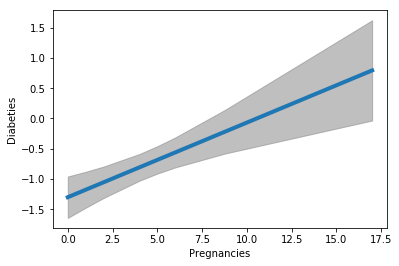

In [134]:
from statsmodels.sandbox.predict_functional import predict_functional

values = {"Glucose":120,'BloodPressure':80,'SkinThickness':30,'Insulin':0,'BMI':30,'DiabetesPedigreeFunction':0.627,'Age':50,'Outcomex':'Diabeties','agegrp':'[18,30)'}

pr , cb , fv = predict_functional(result , 'Pregnancies' , values = values , ci_method = 'simultaneous')

ax = sns.lineplot(fv , pr , lw = 4)
ax.fill_between(fv , cb[:,0],cb[:,1],color = 'grey',alpha = 0.5)
ax.set_xlabel('Pregnancies')
_ = ax.set_ylabel('Diabeties')

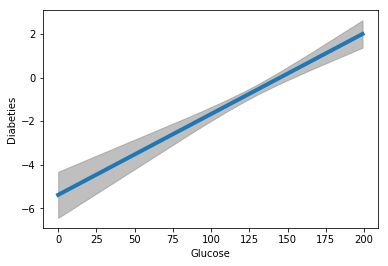

In [137]:
values = {"Pregnancies":3,'BloodPressure':80,'SkinThickness':30,'Insulin':0,'BMI':30,'DiabetesPedigreeFunction':0.627,'Age':50,'Outcomex':'Diabeties','agegrp':'[18,30)'}

pr , cb , fv = predict_functional(result , 'Glucose' , values = values , ci_method = 'simultaneous')

ax = sns.lineplot(fv , pr , lw = 4)
ax.fill_between(fv , cb[:,0],cb[:,1],color = 'grey',alpha = 0.5)
ax.set_xlabel('Glucose')
_ = ax.set_ylabel('Diabeties')

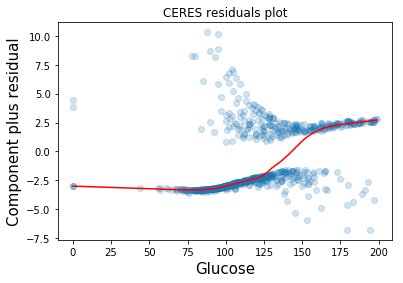

In [144]:
from statsmodels.graphics.regressionplots import add_lowess
fig = result.plot_ceres_residuals("Glucose")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)

We can see that after 125 units of glucose level there is a sharp non linearity in a curve.

In [26]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,agegrp,Outcomex
0,6,148,72,35,0,33.6,0.627,50,1,"(40, 50]",Diabetic
1,1,85,66,29,0,26.6,0.351,31,0,"(30, 40]",Non-Diabetic
2,8,183,64,0,0,23.3,0.672,32,1,"(30, 40]",Diabetic
3,1,89,66,23,94,28.1,0.167,21,0,"(18, 30]",Non-Diabetic
4,0,137,40,35,168,43.1,2.288,33,1,"(30, 40]",Diabetic


In [36]:
def X(x):
    if x.Pregnancies > 4 or x.Glucose > 130:
        return 1
    else:
        return 0
    
dataset['Pred'] = dataset.apply(X , axis = 1)
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,agegrp,Outcomex,Pred
0,6,148,72,35,0,33.6,0.627,50,1,"(40, 50]",Diabetic,1
1,1,85,66,29,0,26.6,0.351,31,0,"(30, 40]",Non-Diabetic,0
2,8,183,64,0,0,23.3,0.672,32,1,"(30, 40]",Diabetic,1
3,1,89,66,23,94,28.1,0.167,21,0,"(18, 30]",Non-Diabetic,0
4,0,137,40,35,168,43.1,2.288,33,1,"(30, 40]",Diabetic,1


In [37]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(dataset.Outcome , dataset.Pred)
acc

0.6705729166666666

In [39]:
dx = dataset[['Pregnancies','Glucose','Outcome']]
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(dx[['Pregnancies','Glucose']] , dx[['Outcome']] , r)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
